# Reasononing with Images

In [10]:
# Warning Control
import warnings
warnings.filterwarnings('ignore')

In [19]:
import json
from openai import OpenAI
from IPython.display import display, Markdown, HTML, Image
from helper import get_openai_api_key
openai_api_key = get_openai_api_key()

GPT_MODEL = "gpt-4o-mini"
o1_MODEL = "o1-mini"

client = OpenAI()

# Process Images

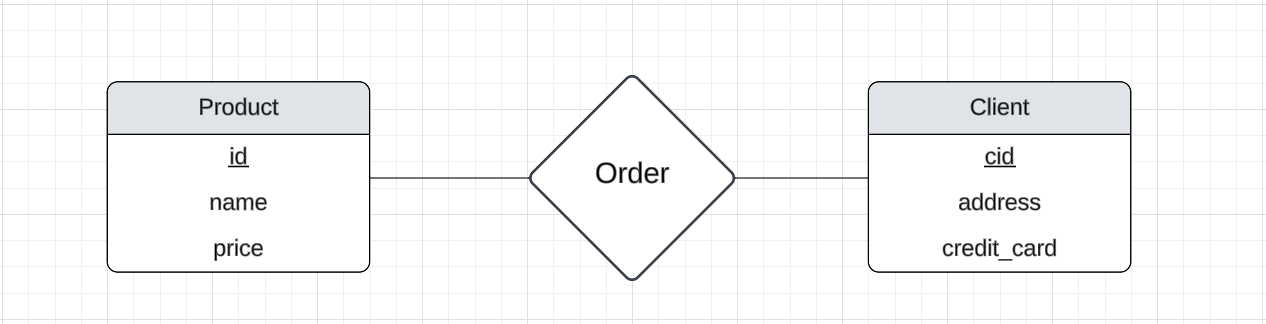

In [20]:
image_filepath = "../Data/erd_relationship_order.png"

display(Image(image_filepath))

In [23]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        file_bytes = image_file.read()
        print(f"Read {len(file_bytes)} bytes from {image_path}")
        encoded = base64.b64encode(file_bytes)
        print(f"Base-64 encoded length: {len(encoded)}")
        return encoded.decode("utf-8")
        # return base64.b64encode(image_file.read()).decode("utf-8")

def o1_vision(file_path, prompt, model, json_mode=False):
    base64_image = encode_image(file_path)

    if json_mode:
        response = client.chat.completions.create(
            model= model,
            messages= [
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64, {base64_image}"}
                    }
                ]}
            ],
            response_format= {"type": "json_object"}
        )
    else:
        response = client.chat.completions.create(
            model = model,
            messages = [
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64, {base64_image}"}
                    }
                ]}
            ]
        )
    return response

In [24]:
response = o1_vision(file_path = image_filepath,
                     prompt = "What is this?",
                     model = GPT_MODEL
                     )

Read 56582 bytes from ../Data/erd_relationship_order.png
Base-64 encoded length: 75444


In [25]:
display(Markdown(response.choices[0].message.content))

This is an Entity-Relationship Diagram (ERD) that represents a simplified database schema. It includes three entities: 

1. **Product**: Contains attributes like `id`, `name`, and `price`, which define the products available for order.

2. **Client**: Contains attributes like `cid`, `address`, and `credit_card`, which describe the clients making the orders.

3. **Order**: The diamond shape typically represents a relationship between the entities. In this case, it indicates that an order is made by a client for a product.

The diagram illustrates how these three components are related, showcasing the structure of the database in terms of products clients can order and the details associated with those orders.